## **Library and Modul**

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight, resample

## **Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
abnormal = pd.read_csv('/content/drive/MyDrive/PTB ECG Dataset/ptbdb_abnormal.csv',header=None)
normal = pd.read_csv('/content/drive/MyDrive/PTB ECG Dataset/ptbdb_normal.csv',header=None)

In [8]:
abnormal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Pre-Processing Data**

In [19]:
#splitting data normal
normal_train,normal_test=train_test_split(normal,test_size=0.2)

In [20]:
#splitting data test
abnormal_train,abnormal_test=train_test_split(abnormal,test_size=0.2)

In [21]:
train = pd.concat([normal_train,abnormal_train], axis=0)
test = pd.concat([normal_test,abnormal_test], axis=0)

In [22]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
3333,1.000000,0.505350,0.252853,0.047432,0.060271,0.125535,0.157989,0.153352,0.152639,0.154066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1193,0.898764,0.959042,0.476430,0.085394,0.043277,0.118238,0.146445,0.132921,0.126739,0.125193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2884,0.900041,0.733581,0.078893,0.026435,0.016522,0.013631,0.057001,0.064436,0.075176,0.076415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081,1.000000,0.624839,0.075290,0.000000,0.131918,0.204633,0.233591,0.243243,0.238739,0.246461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3470,0.900040,0.928029,0.393842,0.132347,0.010796,0.085566,0.113155,0.111955,0.099560,0.097161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,1.000000,0.589798,0.274874,0.016442,0.063659,0.076307,0.049747,0.035835,0.045110,0.038786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,0.997525,0.913366,0.947195,0.874587,0.886139,0.826733,0.754951,0.695545,0.621287,0.647690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1692,0.950949,0.376582,0.167722,0.228639,0.167722,0.182753,0.153481,0.159810,0.169304,0.162184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4051,1.000000,0.563183,0.341654,0.347894,0.131045,0.085803,0.104524,0.068643,0.099844,0.093604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2147,1.000000,0.954112,0.430870,0.187128,0.034565,0.170441,0.275924,0.315256,0.334923,0.355185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2673,1.000000,0.659955,0.285608,0.077554,0.000000,0.211037,0.288591,0.289336,0.310216,0.326622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.993134,0.425094,0.005618,0.000000,0.103620,0.163546,0.184769,0.185393,0.201623,0.207241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1153,0.979121,0.479774,0.126142,0.016529,0.120922,0.217486,0.267073,0.278382,0.284906,0.294041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,1.000000,0.799851,0.401414,0.187128,0.146205,0.149554,0.155134,0.139509,0.140253,0.135045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,1.000000,0.759347,0.356380,0.154006,0.104154,0.105638,0.069733,0.060534,0.058457,0.051039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1398,1.000000,0.777912,0.490763,0.256225,0.004418,0.000000,0.043775,0.122088,0.287550,0.471486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,1.000000,0.870179,0.540452,0.241298,0.251646,0.186265,0.142051,0.119003,0.118062,0.117121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6624,0.905851,0.687638,0.393313,0.138583,0.135064,0.056753,0.029476,0.011879,0.018038,0.002640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
clases = train[187].value_counts()
print(clases)

1.0    8404
0.0    3236
Name: 187, dtype: int64


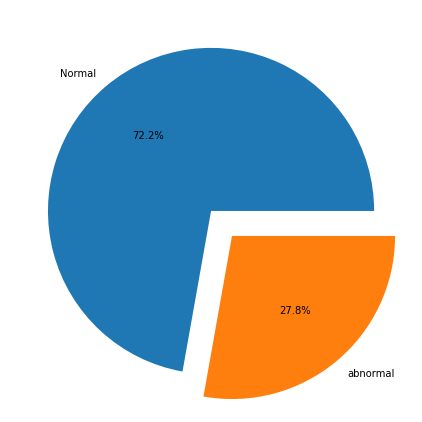

In [25]:
plt.figure(figsize=(7.5,7.5))
explode = (0, 0.2)
plt.pie(clases, labels=['Normal','abnormal'], autopct='%1.1f%%', explode=explode)
plt.show()

0 = Class Normal


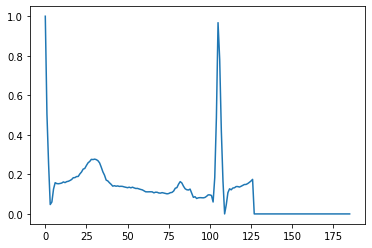

In [27]:
plt.plot(train.iloc[0,:186])
print("0 = Class Normal")

1 = Class Abnormal


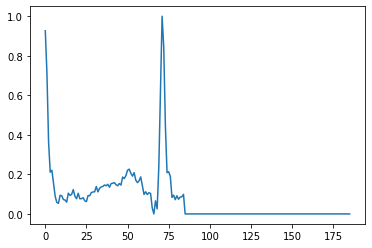

In [29]:
plt.plot(train.iloc[9658,:186])
print("1 = Class Abnormal")

In [30]:
#Train dan Test Label
y_train = to_categorical(train[187])
y_test = to_categorical(test[187])

x_train = train.iloc[:,:186].values
x_test = test.iloc[:,:186].values

x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)

## **Model Training (VGG)**

In [41]:
"""Reference: [Very Deep Convolutional Networks for Large-Scale Image Recognition] (https://arxiv.org/abs/1409.1556)"""


import tensorflow as tf


def Conv_1D_Block(x, model_width, kernel):
    # 1D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv1D(model_width, kernel, padding='same', kernel_initializer="he_normal")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x


class VGG:
    def __init__(self, length, num_channel, num_filters, problem_type='Regression', output_nums=1, dropout_rate=False):
        self.length = length
        self.num_channel = num_channel
        self.num_filters = num_filters
        self.problem_type = problem_type
        self.output_nums = output_nums
        self.dropout_rate = dropout_rate

    def VGG11(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG13(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG16_v2(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 1)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model

    def VGG19(self):
        inputs = tf.keras.Input((self.length, self.num_channel))  # The input tensor
        # Block 1
        x = Conv_1D_Block(inputs, self.num_filters * (2 ** 0), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 0), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 2
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 1), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 3
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 2), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 4
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Block 5
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        x = Conv_1D_Block(x, self.num_filters * (2 ** 3), 3)
        if x.shape[1] <= 2:
            x = tf.keras.layers.MaxPooling1D(pool_size=1, strides=2, padding="valid")(x)
        else:
            x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, padding="valid")(x)

        # Fully Connected (MLP) block
        x = tf.keras.layers.Flatten(name='flatten')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        x = tf.keras.layers.Dense(4096, activation='relu')(x)
        if self.dropout_rate:
            x = tf.keras.layers.Dropout(self.dropout_rate, name='Dropout')(x)
        outputs = tf.keras.layers.Dense(self.output_nums, activation='linear')(x)
        if self.problem_type == 'Classification':
            outputs = tf.keras.layers.Dense(self.output_nums, activation='softmax')(x)

        # Create model.
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        return model


if __name__ == '__main__':
    # Configurations
    length = x_train.shape[1]  # Length of each Segment
    model_name = 'VGG11'  # DenseNet Models
    model_width = 16 # Width of the Initial Layer, subsequent layers start from here
    num_channel = 1  # Number of Input Channels in the Model
    problem_type = 'Classification' # Classification or Regression
    output_nums = 2  # Number of Class for Classification Problems, always '1' for Regression Problems
    #
    Model = VGG(length, num_channel, model_width, problem_type=problem_type, output_nums=output_nums, dropout_rate=False).VGG19()
    history = Model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    Model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 186, 1)]          0         
                                                                 
 conv1d_80 (Conv1D)          (None, 186, 16)           64        
                                                                 
 batch_normalization_80 (Bat  (None, 186, 16)          64        
 chNormalization)                                                
                                                                 
 activation_80 (Activation)  (None, 186, 16)           0         
                                                                 
 conv1d_81 (Conv1D)          (None, 186, 16)           784       
                                                                 
 batch_normalization_81 (Bat  (None, 186, 16)          64        
 chNormalization)                                          

In [42]:
history=Model.fit(x_train, y_train, epochs=20, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/20
117/117 [==============================] - 9s 32ms/step - loss: 0.5374 - accuracy: 0.8301 - val_loss: 0.6942 - val_accuracy: 0.7218
Epoch 2/20
117/117 [==============================] - 3s 25ms/step - loss: 0.1052 - accuracy: 0.9636 - val_loss: 0.6109 - val_accuracy: 0.8201
Epoch 3/20
117/117 [==============================] - 3s 25ms/step - loss: 0.0670 - accuracy: 0.9765 - val_loss: 0.2892 - val_accuracy: 0.9042
Epoch 4/20
117/117 [==============================] - 3s 23ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.0948 - val_accuracy: 0.9653
Epoch 5/20
117/117 [==============================] - 3s 23ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0781 - val_accuracy: 0.9705
Epoch 6/20
117/117 [==============================] - 3s 29ms/step - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.0778 - val_accuracy: 0.9797
Epoch 7/20
117/117 [==============================] - 4s 34ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0407 - val_accuracy: 0.9859

## **Evaluasi**

In [43]:
scores = Model.evaluate(x_test,y_test, verbose=1)
y_predict = Model.predict(x_test)

91/91 [==============================] - 1s 5ms/step


In [46]:
acc_VGG = history.history['accuracy']
val_acc_VGG = history.history['val_accuracy']

loss_VGG = history.history['loss']
val_loss_VGG = history.history['val_loss']

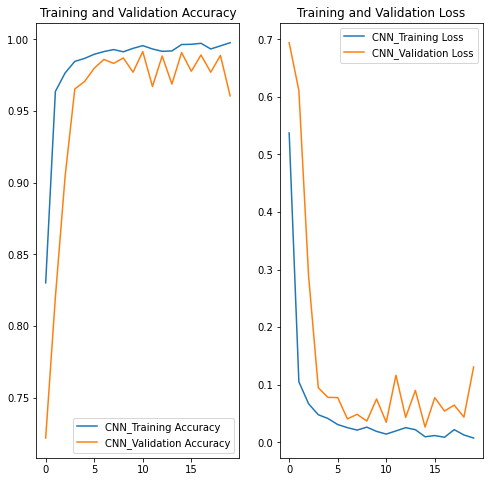

In [49]:
#Tentukan jumlah Epoch yang dijalankan pada model yang akan dievaluasi
EPOCHS = 20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc_VGG, label='CNN_Training Accuracy')
plt.plot(range(EPOCHS), val_acc_VGG, label='CNN_Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss_VGG, label='CNN_Training Loss')
plt.plot(range(EPOCHS), val_loss_VGG, label='CNN_Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
from operator import itemgetter

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
y_predict

array([[9.9999654e-01, 3.4079098e-06],
       [9.9877006e-01, 1.2299201e-03],
       [9.7948164e-01, 2.0518357e-02],
       ...,
       [7.4893569e-06, 9.9999249e-01],
       [1.3046135e-03, 9.9869543e-01],
       [1.6399497e-03, 9.9836010e-01]], dtype=float32)

In [55]:
rounded_y_predict = np.argmax(y_predict, axis=-1)
rounded_y_predict

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
test[187]

2147     0.0
2673     0.0
94       0.0
1153     0.0
729      0.0
        ... 
4321     1.0
1398     1.0
100      1.0
6624     1.0
10466    1.0
Name: 187, Length: 2912, dtype: float64

In [61]:
test[187] = test[187].apply(int)

In [62]:
test[187]

2147     0
2673     0
94       0
1153     0
729      0
        ..
4321     1
1398     1
100      1
6624     1
10466    1
Name: 187, Length: 2912, dtype: int64

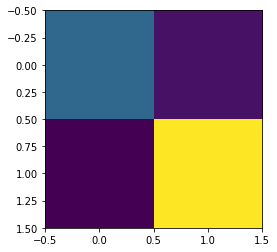

In [64]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test[187],rounded_y_predict)
plt.imshow(cf_matrix)

Normalized confusion matrix


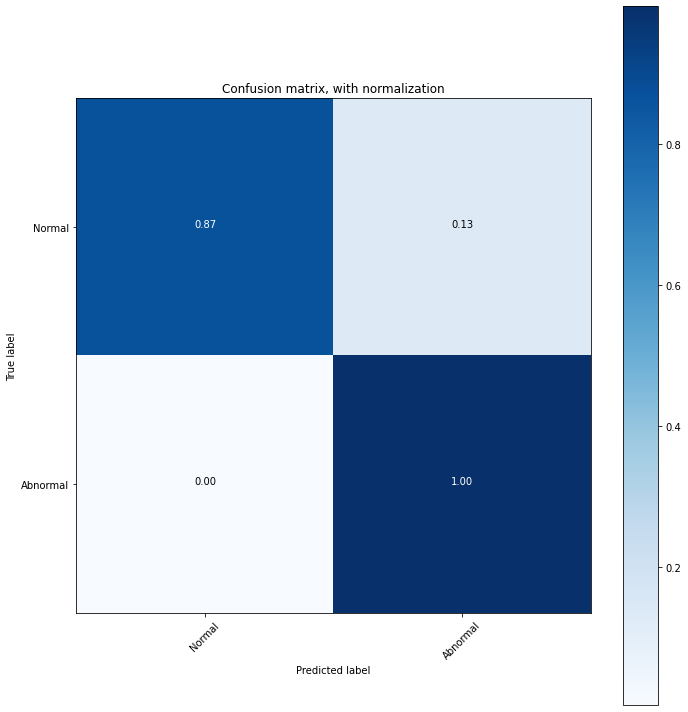

In [65]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cf_matrix, classes=['Normal','Abnormal'],normalize=True,title='Confusion matrix, with normalization')
plt.show()

In [67]:
from sklearn.metrics import classification_report
print( classification_report(np.argmax(y_test, axis=1), np.argmax(y_predict, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       810
           1       0.95      1.00      0.97      2102

    accuracy                           0.96      2912
   macro avg       0.97      0.93      0.95      2912
weighted avg       0.96      0.96      0.96      2912

